# **Deep Learning Project**
**MSc. Data Science Block 3 2023**


Sinéad Walsh


L00161930

Data was obtained from [Kaggle Cyberbullying Classification ](https://www.kaggle.com/datasets/andrewmvd/cyberbullying-classification)

# Loading the Data

In [ ]:
import pandas as pd

pd.options.display.max_rows = None
pd.options.display.max_columns = None
pd.options.display.max_colwidth = None


!unzip '/content/archive.zip'
df = pd.read_csv('/content/cyberbullying_tweets.csv')


df.head(5)

Archive:  /content/archive.zip
  inflating: cyberbullying_tweets.csv  


,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was crapilicious! #mkr",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImACelebrityAU #today #sunrise #studio10 #Neighbours #WonderlandTen #etc,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red velvet cupcakes?,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, but not too concerned about another angry dude on twitter.",not_cyberbullying
4,"@RudhoeEnglish This is an ISIS account pretending to be a Kurdish account. Like Islam, it is all lies.",not_cyberbullying


# NLP Tweet Pre-processing

### Tweet Cleaning

In [ ]:
#Installed the Tweet Preprocessor Library

!pip install tweet-preprocessor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Remove the hashtag symbol, but keep the associated words.

import re

def remove_hash_symbol(tweet):
    tweet = re.sub(r'#', '', tweet)
    return tweet

df['tweet_text'] = df['tweet_text'].apply(remove_hash_symbol)

df.head(5)

,tweet_text,cyberbullying_type
0,"In other words katandandre, your food was crapilicious! mkr",not_cyberbullying
1,Why is aussietv so white? MKR theblock ImACelebrityAU today sunrise studio10 Neighbours WonderlandTen etc,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red velvet cupcakes?,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, but not too concerned about another angry dude on twitter.",not_cyberbullying
4,"@RudhoeEnglish This is an ISIS account pretending to be a Kurdish account. Like Islam, it is all lies.",not_cyberbullying


In [ ]:
#From tweet preprocessor, p.clean removes any URLs, Mentions, Twitter Reserved words, Emojis, & Smileys.
#This function also removes entire hastags, but we want to keep the associated words.

import preprocessor as pp

df['tweet_text'] = df['tweet_text'].apply(pp.clean)
df.tail(5)

,tweet_text,cyberbullying_type
47687,"Black ppl aren't expected to do anything, depended on for anything. Yet free to participate, work, enjoy the freedom of humans all across this globe. If you waste your energy on the past you will be wasting it for building the future.",ethnicity
47688,Turner did not withhold his disappointment. Turner called the court an abominable conclave of negro hating demons (with one exception) who issued another decree that colored men and women must be driven into Jim Crow cars whenever it suits the whim of any white community.,ethnicity
47689,I swear to God. This dumb nigger bitch. I have got to bleach my hair reeeeeal fuckin' soon. D:&lt; FUCK.,ethnicity
47690,"Yea fuck you RT : IF YOURE A NIGGER FUCKING UNFOLLOW ME, FUCKING DUMB NIGGERS.",ethnicity
47691,Bro. U gotta chill RT : Dog FUCK KP that dumb nigger bitch lmao,ethnicity


In [ ]:
#The above function did not remove the accronym 'RT' in retweets,
#therefore we must remove it but mask it so we do not remove it from words.

def remove_RT(tweet):
    tweet = re.sub(' RT : ', ' ', tweet)
    return tweet

df['tweet_text'] = df['tweet_text'].apply(remove_RT)

df.tail(5)

,tweet_text,cyberbullying_type
47687,"Black ppl aren't expected to do anything, depended on for anything. Yet free to participate, work, enjoy the freedom of humans all across this globe. If you waste your energy on the past you will be wasting it for building the future.",ethnicity
47688,Turner did not withhold his disappointment. Turner called the court an abominable conclave of negro hating demons (with one exception) who issued another decree that colored men and women must be driven into Jim Crow cars whenever it suits the whim of any white community.,ethnicity
47689,I swear to God. This dumb nigger bitch. I have got to bleach my hair reeeeeal fuckin' soon. D:&lt; FUCK.,ethnicity
47690,"Yea fuck you IF YOURE A NIGGER FUCKING UNFOLLOW ME, FUCKING DUMB NIGGERS.",ethnicity
47691,Bro. U gotta chill Dog FUCK KP that dumb nigger bitch lmao,ethnicity


In [ ]:
#Remove digits & remaining special characters.

def remove_special_chars(tweet):
    tweet = re.sub(r'[^a-zA-Z0-9\s]+', '', tweet)    
    return tweet


df['tweet_text'] = df['tweet_text'].apply(remove_special_chars)
df.head(5)

,tweet_text,cyberbullying_type
0,In other words katandandre your food was crapilicious mkr,not_cyberbullying
1,Why is aussietv so white MKR theblock ImACelebrityAU today sunrise studio10 Neighbours WonderlandTen etc,not_cyberbullying
2,a classy whore Or more red velvet cupcakes,not_cyberbullying
3,meh thanks for the heads up but not too concerned about another angry dude on twitter,not_cyberbullying
4,This is an ISIS account pretending to be a Kurdish account Like Islam it is all lies,not_cyberbullying


In [ ]:
#Changed everything to lowercase.

def lower_case(tweet):
    tweet = tweet.lower()
    return tweet

df['tweet_text'] = df['tweet_text'].apply(lower_case)
df.head(5)

,tweet_text,cyberbullying_type
0,in other words katandandre your food was crapilicious mkr,not_cyberbullying
1,why is aussietv so white mkr theblock imacelebrityau today sunrise studio10 neighbours wonderlandten etc,not_cyberbullying
2,a classy whore or more red velvet cupcakes,not_cyberbullying
3,meh thanks for the heads up but not too concerned about another angry dude on twitter,not_cyberbullying
4,this is an isis account pretending to be a kurdish account like islam it is all lies,not_cyberbullying


### Lemmentization, Tokenization & Stopword Removal

In [ ]:
#Tokenized & Lammentized tweets.

import spacy
nlp = spacy.load('en_core_web_sm')

def lemmatize(tweet):
  nlp_obj = nlp(tweet)
  lemmatized_tokens = [token.lemma_ for token in nlp_obj]
  return lemmatized_tokens

df['lemmatised_tokens'] = df['tweet_text'].apply(lemmatize)
df.head()

,tweet_text,cyberbullying_type,lemmatised_tokens
0,in other words katandandre your food was crapilicious mkr,not_cyberbullying,"[in, other, word, katandandre, your, food, be, crapilicious, mkr]"
1,why is aussietv so white mkr theblock imacelebrityau today sunrise studio10 neighbours wonderlandten etc,not_cyberbullying,"[why, be, aussietv, so, white, mkr, theblock, imacelebrityau, today, sunrise, studio10, neighbour, wonderlandten, etc]"
2,a classy whore or more red velvet cupcakes,not_cyberbullying,"[a, classy, whore, or, more, red, velvet, cupcake]"
3,meh thanks for the heads up but not too concerned about another angry dude on twitter,not_cyberbullying,"[meh, thank, for, the, head, up, but, not, too, concerned, about, another, angry, dude, on, twitter]"
4,this is an isis account pretending to be a kurdish account like islam it is all lies,not_cyberbullying,"[this, be, an, isis, account, pretend, to, be, a, kurdish, account, like, islam, it, be, all, lie]"


In [ ]:
#Removed stop words.

import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

StopWords = stopwords.words('english')
df['processed_tweet'] = df['lemmatised_tokens'].apply(lambda x: [item for item in x if item not in StopWords])
df.head(5)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,tweet_text,cyberbullying_type,lemmatised_tokens,processed_tweet
0,in other words katandandre your food was crapilicious mkr,not_cyberbullying,"[in, other, word, katandandre, your, food, be, crapilicious, mkr]","[word, katandandre, food, crapilicious, mkr]"
1,why is aussietv so white mkr theblock imacelebrityau today sunrise studio10 neighbours wonderlandten etc,not_cyberbullying,"[why, be, aussietv, so, white, mkr, theblock, imacelebrityau, today, sunrise, studio10, neighbour, wonderlandten, etc]","[aussietv, white, mkr, theblock, imacelebrityau, today, sunrise, studio10, neighbour, wonderlandten, etc]"
2,a classy whore or more red velvet cupcakes,not_cyberbullying,"[a, classy, whore, or, more, red, velvet, cupcake]","[classy, whore, red, velvet, cupcake]"
3,meh thanks for the heads up but not too concerned about another angry dude on twitter,not_cyberbullying,"[meh, thank, for, the, head, up, but, not, too, concerned, about, another, angry, dude, on, twitter]","[meh, thank, head, concerned, another, angry, dude, twitter]"
4,this is an isis account pretending to be a kurdish account like islam it is all lies,not_cyberbullying,"[this, be, an, isis, account, pretend, to, be, a, kurdish, account, like, islam, it, be, all, lie]","[isis, account, pretend, kurdish, account, like, islam, lie]"


In [ ]:
#Removed tweets with 3 or less words are they are generally replies to other tweets are labelled as bullying without context.

df['word_count'] = df['processed_tweet'].str.len()
df = df[df["word_count"] > 3]
df.head()

,tweet_text,cyberbullying_type,lemmatised_tokens,processed_tweet,word_count
0,in other words katandandre your food was crapilicious mkr,not_cyberbullying,"[in, other, word, katandandre, your, food, be, crapilicious, mkr]","[word, katandandre, food, crapilicious, mkr]",5
1,why is aussietv so white mkr theblock imacelebrityau today sunrise studio10 neighbours wonderlandten etc,not_cyberbullying,"[why, be, aussietv, so, white, mkr, theblock, imacelebrityau, today, sunrise, studio10, neighbour, wonderlandten, etc]","[aussietv, white, mkr, theblock, imacelebrityau, today, sunrise, studio10, neighbour, wonderlandten, etc]",11
2,a classy whore or more red velvet cupcakes,not_cyberbullying,"[a, classy, whore, or, more, red, velvet, cupcake]","[classy, whore, red, velvet, cupcake]",5
3,meh thanks for the heads up but not too concerned about another angry dude on twitter,not_cyberbullying,"[meh, thank, for, the, head, up, but, not, too, concerned, about, another, angry, dude, on, twitter]","[meh, thank, head, concerned, another, angry, dude, twitter]",8
4,this is an isis account pretending to be a kurdish account like islam it is all lies,not_cyberbullying,"[this, be, an, isis, account, pretend, to, be, a, kurdish, account, like, islam, it, be, all, lie]","[isis, account, pretend, kurdish, account, like, islam, lie]",8


# Data Exploration

In [ ]:
#Calculating some descriptive statistics:

df_stats = df.groupby('cyberbullying_type').mean('word_count')
df_stats.rename(columns = {'word_count':'Mean Word Count'}, inplace = True)
df_stats['Min Word Count'] = df.groupby('cyberbullying_type').min('word_count')
df_stats['Max Word Count'] = df.groupby('cyberbullying_type').max('word_count')
df_stats.head()

,Mean Word Count,Min Word Count,Max Word Count
cyberbullying_type,,,
age,18.305955,4,155
ethnicity,15.235249,4,185
gender,14.102551,4,122
not_cyberbullying,8.997568,4,146
other_cyberbullying,9.165207,4,396


In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

# download image for wordcloud mask
!wget --quiet https://logowik.com/content/uploads/images/761_twitter.jpg

# save mask to tweet_mask
tweet_mask = np.array(Image.open('761_twitter.jpg'))


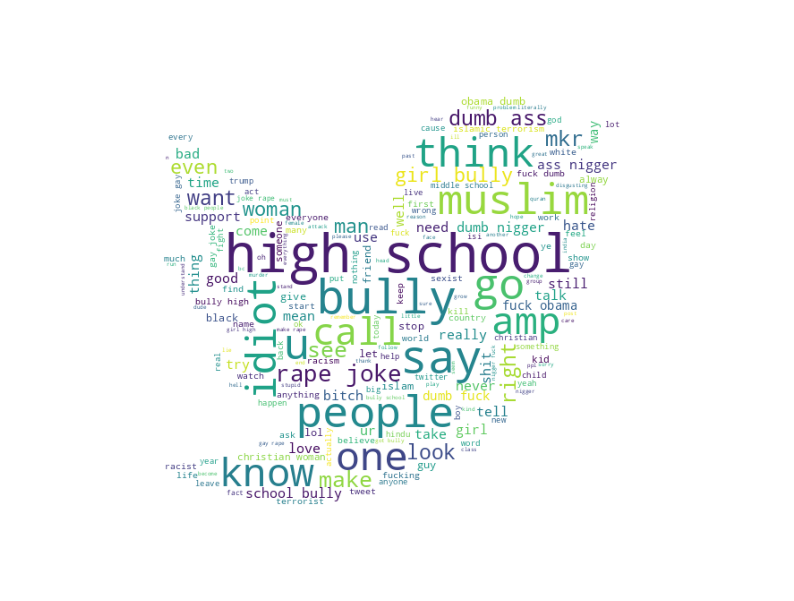

In [ ]:
#Created a WordCloud:

text = df['processed_tweet'].tolist()
flat_text = []
for sublist in text:
    for item in sublist:
        flat_text.append(item)


#converted flat_text to string and generated wordcloud

unique_string=(" ").join(flat_text)
wordcloud = WordCloud(width = 1000, height = 500, colormap='viridis', mask = tweet_mask, background_color='white').generate(unique_string)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

# Tweet Encoding

In [ ]:
from collections import Counter

In [ ]:
#Created a dictionary that counted the number of times a word appeared in the processed_tweets

tweet_tokens = df['processed_tweet'].tolist()

vocab = Counter()  

for i, tweet in enumerate(tweet_tokens):
    tweet_tokens[i] = []
    for token in tweet:  
        vocab.update([token]) 
        tweet_tokens[i].append(token)

In [ ]:
#Removed words that only appeared once in the vocab, ordered the vocab by most occuring words.
#Added padding and unknown to vocab & converted each word in the vocab to an integer.

vocab = {k:v for k,v in vocab.items() if v>1}

vocab = sorted(vocab, key=vocab.get, reverse=True)

vocab = ['_PAD','_UNK'] + vocab

wordstoindex = {o:i for i,o in enumerate(vocab)}

In [ ]:
#Mapped the tweets to vectors of integers using the wordstoindex list

for i, tweet in enumerate(tweet_tokens):
    tweet_tokens[i] = [wordstoindex[word] if word in wordstoindex else 0 for word in tweet]

In [ ]:
#Created a tweet padding function, that shortens tweets to a specified length (150).
#Or adds padding of zeros to make tweets up to that length.

def tweet_padder(tweets, seq_len):
    features = np.zeros((len(tweets), seq_len),dtype=int)
    for ii, tweet in enumerate(tweets):
        if len(tweet) != 0:
            features[ii, -len(tweet):] = np.array(tweet)[:seq_len]
    return features


tweets_encoded = tweet_padder(tweet_tokens, 150)


In [ ]:
#Encoded the class labels.

def label_encoder(label):
    if label == "not_cyberbullying":
        return 0
    elif label == "age":
        return 1
    elif label == "ethnicity":
      return 2
    elif label == "gender":
      return 3
    elif label == "religion":
      return 4
    else: #other_cyberbullying
        return 5

labels = df['cyberbullying_type'].apply(label_encoder)
labels = np.array(labels)
labels

array([0, 0, 0, ..., 2, 2, 2])

# LSTM

In [ ]:
#Imported some required libraries/modules.

import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split

In [ ]:
#Imported the helper functions from LSTM_helper_train_eval_test.py.

from LSTM_helper_functions import LSTM_train, LSTM_evaluate, LSTM_test

In [ ]:
#Split the data into training, validation & test sets with stratified labels

train_tweets, test_val_tweets, train_labels, test_val_labels = train_test_split(tweets_encoded, labels, random_state=42, stratify=labels, test_size=0.2)

val_tweets, test_tweets, val_labels, test_labels = train_test_split(test_val_tweets, test_val_labels, random_state=42, stratify=test_val_labels, test_size=0.5)

print('Train Size:', train_tweets.shape)
print('Validation Size:', val_tweets.shape)
print('Test Size:', test_tweets.shape)

Train Size: (35152, 150)
Validation Size: (4394, 150)
Test Size: (4394, 150)


In [ ]:
#Converted the numpy arrays to tensors.

train_tensor = TensorDataset(torch.from_numpy(train_tweets), torch.from_numpy(train_labels))
val_tensor = TensorDataset(torch.from_numpy(val_tweets), torch.from_numpy(val_labels))
test_tensor = TensorDataset(torch.from_numpy(test_tweets), torch.from_numpy(test_labels))


In [ ]:
#Shuffled and split the datasets into batch sizes of 256.

batch_size = 256

train_data = DataLoader(train_tensor, shuffle=True, batch_size=batch_size, drop_last=True)
val_data = DataLoader(val_tensor, shuffle=True, batch_size=batch_size, drop_last=True)
test_data = DataLoader(test_tensor, shuffle=True, batch_size=batch_size, drop_last=True)

In [ ]:
#Set up device to use GPU if available, or to use CPU if not.

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

## Designing the LSTM

In [ ]:
class LSTM_Classifier(torch.nn.Module) :
    def __init__(self, vocab_size, output_size, embedding_dim, hidden_dim, num_layers, dropout) :
        super().__init__()

        #Embedding layer(like a lookup function):
        #Takes the vocab size (len(wordstoindex) and the embedding size as input.
        self.embedding = nn.Embedding(num_embeddings=vocab_size, 
                                      embedding_dim=embedding_dim)

        #LSTM layers(s):
        self.lstm = nn.LSTM(input_size=embedding_dim, #Takes the embeddings.
                            hidden_size=hidden_dim, #Number of nodes in each layer.
                            num_layers=num_layers, #Number of layers.
                            batch_first=True) #Batch tensors are shape (batch, numseq, seqlength)
        
        #Used dropout to reduce overfitting.
        self.dropout = nn.Dropout(dropout)

        #Fully-connected (MLP) layer 1:
        #Takes in the hidden width of the LSTM, activates using ReLu 
        #and passes to the next hidden MLP layer which is the same size.
        self.fc = nn.Linear(in_features=hidden_dim, 
                            out_features=hidden_dim)
        self.relu = nn.ReLU()
        
        #Fully-connected (MLP) layer 2:
        #Takes the input from previous hidden_dim and outputs a vector membership scores for each class (6).
        self.fc = nn.Linear(in_features=hidden_dim, out_features=output_size)
        

    #Forward Pass takes the inputs & weights.
    def forward(self, x, hidden):
       
        #Converts the inputs of encoded tokens to embeddings.
        embs = self.embedding(x)

        #Embeddings passed to the LSTM layer(s)
        out, hidden = self.lstm(embs, hidden)

        #Applied dropout & passes through remaining layers
        out = self.dropout(out)
        out = self.fc(out)
        out = self.relu(out)

        #We extract the scores for the final hidden state since it is the one that matters.
        out = out[:, -1, :]
        return out, hidden
    
    #Initialises the state of the hidden LSTM layers, which will be updated during training.
    def init_hidden(self):
        return (torch.zeros(num_layers, batch_size, hidden_dim), torch.zeros(num_layers, batch_size, hidden_dim))

## Hyperparameter Set 1 

The first model is relatively simple with the following hyperparameters:


Embedding Size = 50

Hidden Layer Width = 32

Number of LSTM Layers = 1

Dropout Probability = 0.5

Epochs = 15

In [ ]:
#Set the model hyperparameters. 

vocab_size=len(wordstoindex)
embedding_dim=50
hidden_dim=32
num_layers=1
dropout_prob=0.5
output_size=6

#Created the model & pushed it to the device (depending on cpu/gpu availability)

model = LSTM_Classifier(vocab_size, output_size, embedding_dim, hidden_dim, num_layers, dropout_prob)
model = model.to(device)

In [ ]:
#Set the number of epochs, learning rate, loss function & optimiser.
num_epochs = 15
learning_rate=0.005
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)


#Created lists to record loss & accuracy across epochs.
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

#Trained the model & evaluated with val_data using the helper functions.
#Recorded the performance after every epoch.
for epoch in range(num_epochs):
    train_loss, train_accuracy = LSTM_train(model, train_data, criterion, optimizer, device)
    val_loss, val_accuracy = LSTM_evaluate(model, val_data, criterion, device)
    
    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)
    val_losses.append(val_loss)
    val_accuracies.append(val_accuracy)
    
    print(f"Epoch {epoch + 1}/{num_epochs}")
    print(f"Train Loss: {train_loss:.4f} | Train Accuracy: {train_accuracy:.4f}")
    print(f"Val Loss: {val_loss:.4f} | Val Accuracy: {val_accuracy:.4f}")
    print("--------------------------------------------------")


Epoch 1/15
Train Loss: 1.0249 | Train Accuracy: 0.6050
Val Loss: 0.5457 | Val Accuracy: 0.7845
--------------------------------------------------
Epoch 2/15
Train Loss: 0.5150 | Train Accuracy: 0.7959
Val Loss: 0.4675 | Val Accuracy: 0.8134
--------------------------------------------------
Epoch 3/15
Train Loss: 0.4315 | Train Accuracy: 0.8285
Val Loss: 0.4318 | Val Accuracy: 0.8249
--------------------------------------------------
Epoch 4/15
Train Loss: 0.4088 | Train Accuracy: 0.8394
Val Loss: 0.4331 | Val Accuracy: 0.8293
--------------------------------------------------
Epoch 5/15
Train Loss: 0.3532 | Train Accuracy: 0.8639
Val Loss: 0.4352 | Val Accuracy: 0.8272
--------------------------------------------------
Epoch 6/15
Train Loss: 0.3194 | Train Accuracy: 0.8778
Val Loss: 0.4381 | Val Accuracy: 0.8394
--------------------------------------------------
Epoch 7/15
Train Loss: 0.2910 | Train Accuracy: 0.8889
Val Loss: 0.4345 | Val Accuracy: 0.8323
-----------------------------

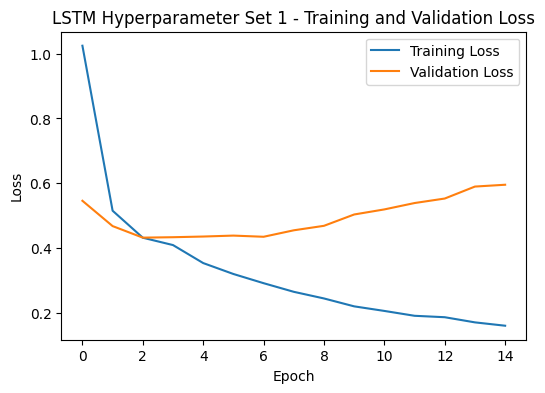

In [ ]:
#Plotted the training & validation loss.

plt.figure(figsize=(6, 4))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('LSTM Hyperparameter Set 1 - Training and Validation Loss')
plt.legend()
plt.show()


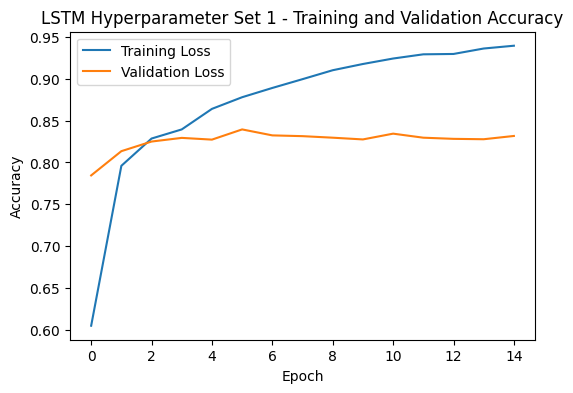

In [ ]:
#Plotted the training & validation accuracy.

plt.figure(figsize=(6, 4))
plt.plot(train_accuracies, label='Training Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('LSTM Hyperparameter Set 1 - Training and Validation Accuracy')
plt.legend()
plt.show()

## Hyperparameters Set 2

In Set 1, the validation performance was low, but overfitting was high.
Therefore, to investigate if increasing model complexity improves the validation accuracy & increasing dropout decreases the overfitting, the following parameters were used in Set 2: 

Embedding Size = 100

Hidden Layer Width = 64

Number of LSTM Layers = 2

Dropout Probability = 0.8

Epochs = 15

In [ ]:
#Set the model hyperparameters. 

vocab_size=len(wordstoindex)
embedding_dim=100
hidden_dim=65
num_layers=2
dropout_prob=0.8
output_size=6

#Created the model & pushed it to the device (depending on cpu/gpu availability)

model = LSTM_Classifier(vocab_size, output_size, embedding_dim, hidden_dim, num_layers, dropout_prob)
model = model.to(device)

In [ ]:
#Set the number of epochs, learning rate, loss function & optimiser.
num_epochs = 15
learning_rate=0.005
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)


#Created lists to record loss & accuracy across epochs.
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

#Trained the model & evaluated with val_data using the helper functions.
#Recorded the performance after every epoch.
for epoch in range(num_epochs):
    train_loss, train_accuracy = LSTM_train(model, train_data, criterion, optimizer, device)
    val_loss, val_accuracy = LSTM_evaluate(model, val_data, criterion, device)
    
    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)
    val_losses.append(val_loss)
    val_accuracies.append(val_accuracy)
    
    print(f"Epoch {epoch + 1}/{num_epochs}")
    print(f"Train Loss: {train_loss:.4f} | Train Accuracy: {train_accuracy:.4f}")
    print(f"Val Loss: {val_loss:.4f} | Val Accuracy: {val_accuracy:.4f}")
    print("--------------------------------------------------")

Epoch 1/15
Train Loss: 0.8375 | Train Accuracy: 0.6781
Val Loss: 0.5097 | Val Accuracy: 0.7812
--------------------------------------------------
Epoch 2/15
Train Loss: 0.5054 | Train Accuracy: 0.7937
Val Loss: 0.4570 | Val Accuracy: 0.8035
--------------------------------------------------
Epoch 3/15
Train Loss: 0.4298 | Train Accuracy: 0.8230
Val Loss: 0.4302 | Val Accuracy: 0.8215
--------------------------------------------------
Epoch 4/15
Train Loss: 0.3669 | Train Accuracy: 0.8546
Val Loss: 0.4356 | Val Accuracy: 0.8410
--------------------------------------------------
Epoch 5/15
Train Loss: 0.3222 | Train Accuracy: 0.8755
Val Loss: 0.4481 | Val Accuracy: 0.8442
--------------------------------------------------
Epoch 6/15
Train Loss: 0.2852 | Train Accuracy: 0.8927
Val Loss: 0.5018 | Val Accuracy: 0.8433
--------------------------------------------------
Epoch 7/15
Train Loss: 0.2428 | Train Accuracy: 0.9091
Val Loss: 0.5495 | Val Accuracy: 0.8387
-----------------------------

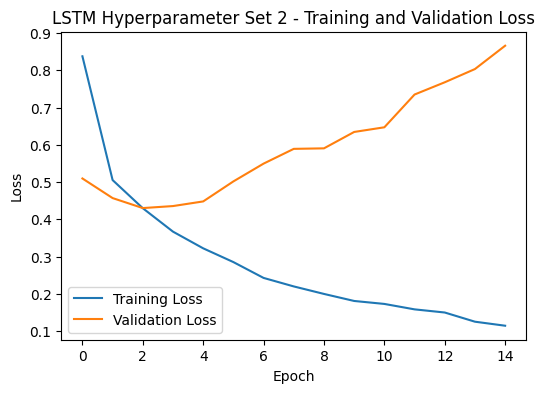

In [ ]:
#Plotted the training & validation loss.

plt.figure(figsize=(6, 4))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('LSTM Hyperparameter Set 2 - Training and Validation Loss')
plt.legend()
plt.show()


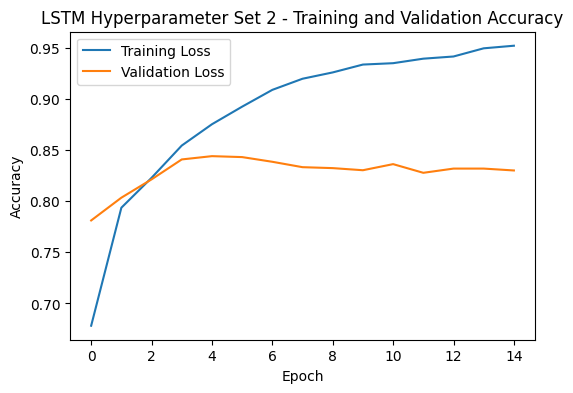

In [ ]:
#Plotted the training & validation accuracy.

plt.figure(figsize=(6, 4))
plt.plot(train_accuracies, label='Training Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('LSTM Hyperparameter Set 2 - Training and Validation Accuracy')
plt.legend()
plt.show()

## Final Model

In Set 2, the increase model complexity & dropout did not improve model performance. It is likely that the maximum achievable validation accuracy is approximately 0.83  Therefore, a final model is trained using the following parameters: 

Embedding Size = 50

Hidden Layer Width = 32

Number of LSTM Layers = 1

Dropout Probability = 0.8

Epochs = 10

In [ ]:
#Set the model variables. 

vocab_size=len(wordstoindex)
embedding_dim=50
hidden_dim=32
num_layers=1
dropout_prob=0.8
output_size=6

#Created the model & pushed it to the device (depending on cpu/gpu availability)

model = LSTM_Classifier(vocab_size, output_size, embedding_dim, hidden_dim, num_layers, dropout_prob)
model = model.to(device)

In [ ]:
#Set the number of epochs, learning rate, loss function & optimiser.
num_epochs = 10
learning_rate=0.005
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)


#Created lists to record loss & accuracy across epochs.
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

#Trained the model & evaluated with val_data using the helper functions.
#Recorded the performance after every epoch.
for epoch in range(num_epochs):
    train_loss, train_accuracy = LSTM_train(model, train_data, criterion, optimizer, device)
    val_loss, val_accuracy = LSTM_evaluate(model, val_data, criterion, device)
    
    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)
    val_losses.append(val_loss)
    val_accuracies.append(val_accuracy)
    
    print(f"Epoch {epoch + 1}/{num_epochs}")
    print(f"Train Loss: {train_loss:.4f} | Train Accuracy: {train_accuracy:.4f}")
    print(f"Val Loss: {val_loss:.4f} | Val Accuracy: {val_accuracy:.4f}")
    print("--------------------------------------------------")

Epoch 1/10
Train Loss: 1.2419 | Train Accuracy: 0.5087
Val Loss: 0.6571 | Val Accuracy: 0.7344
--------------------------------------------------
Epoch 2/10
Train Loss: 0.7116 | Train Accuracy: 0.7178
Val Loss: 0.5087 | Val Accuracy: 0.7948
--------------------------------------------------
Epoch 3/10
Train Loss: 0.6716 | Train Accuracy: 0.7394
Val Loss: 0.4792 | Val Accuracy: 0.7939
--------------------------------------------------
Epoch 4/10
Train Loss: 0.5620 | Train Accuracy: 0.7706
Val Loss: 0.4571 | Val Accuracy: 0.8150
--------------------------------------------------
Epoch 5/10
Train Loss: 0.5191 | Train Accuracy: 0.7827
Val Loss: 0.4465 | Val Accuracy: 0.8143
--------------------------------------------------
Epoch 6/10
Train Loss: 0.4953 | Train Accuracy: 0.7907
Val Loss: 0.4595 | Val Accuracy: 0.8159
--------------------------------------------------
Epoch 7/10
Train Loss: 0.4710 | Train Accuracy: 0.7991
Val Loss: 0.4537 | Val Accuracy: 0.8251
-----------------------------

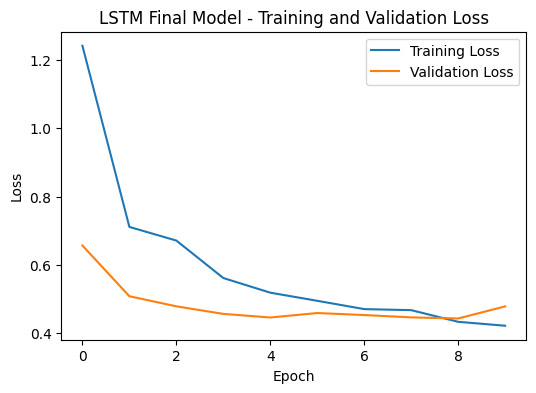

In [ ]:
#Plotted the training & validation loss.

plt.figure(figsize=(6, 4))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('LSTM Final Model - Training and Validation Loss')
plt.legend()
plt.show()


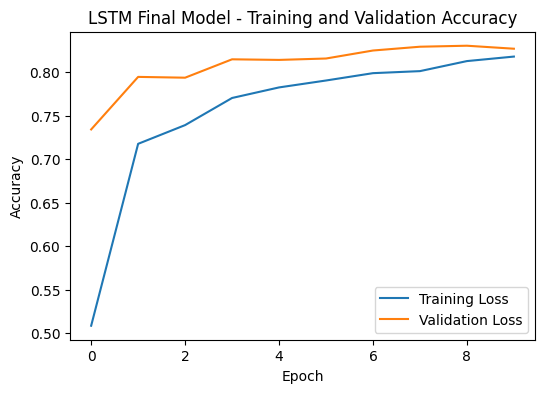

In [ ]:
#Plotted the training & validation accuracy.

plt.figure(figsize=(6, 4))
plt.plot(train_accuracies, label='Training Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('LSTM Final Model - Training and Validation Accuracy')
plt.legend()
plt.show()

##Test Set Performance Evaluation

In [ ]:
#Final performance evaluation using the test data.

test_loss, test_accuracy = LSTM_test(model, test_data, criterion, device)
print(f"Test Loss: {test_loss:.4f} | Test Accuracy: {test_accuracy:.4f}")

Test Loss: 0.5455 | Test Accuracy: 0.8189


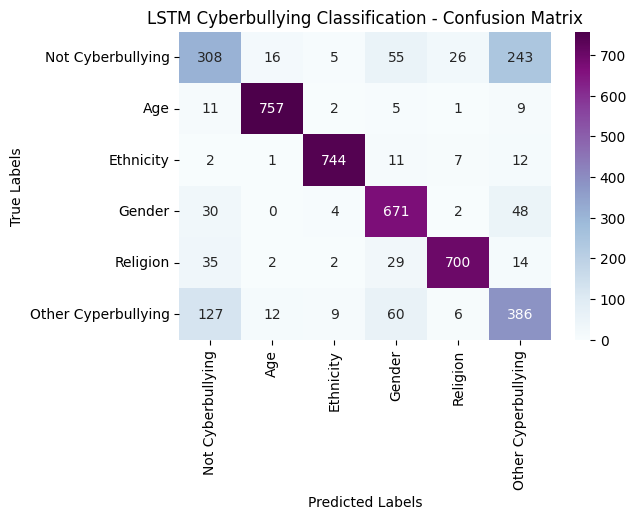

In [ ]:
#Created a confusion matrix visualising the results.

from sklearn.metrics import confusion_matrix
import seaborn as sns

#Retrieved the labels & predictions.
true_labels = []
predicted_labels = []

with torch.no_grad():
    for inputs, labels in test_data:
        inputs = inputs.to(device)
        labels = labels.to(device)

        hidden = model.init_hidden()
        hidden = (hidden[0].to(device), hidden[1].to(device))

        outputs, hidden = model(inputs, hidden)

        _, predicted = torch.max(outputs, 1)

        true_labels.extend(labels.cpu().numpy())
        predicted_labels.extend(predicted.cpu().numpy())

#Converted the labels to numpy arrays
true_labels = np.array(true_labels)
predicted_labels = np.array(predicted_labels)

#Class labels
class_labels = ['Not Cyberbullying', 'Age', 'Ethnicity', 'Gender', 'Religion', 'Other Cyperbullying']

#Plotted the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="BuPu", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('LSTM Cyberbullying Classification - Confusion Matrix')
plt.show()

# GRU

Same set up as before:

In [ ]:
#Imported helper functions from GRU_helper_functions.py

from GRU_helper_functions import GRU_train, GRU_evaluate, GRU_test

In [ ]:
#Shuffled and split the datasets into batch sizes of 256.

batch_size = 256

train_data = DataLoader(train_tensor, shuffle=True, batch_size=batch_size, drop_last=True)
val_data = DataLoader(val_tensor, shuffle=True, batch_size=batch_size, drop_last=True)
test_data = DataLoader(test_tensor, shuffle=True, batch_size=batch_size, drop_last=True)

In [ ]:
#Set up device to use GPU if available, or to use CPU if not.

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

## Designing the GRU

In [ ]:
class GRU_Classifier(torch.nn.Module):
    def __init__(self, vocab_size, output_size, embedding_dim, hidden_dim, num_layers, dropout):
        super().__init__()

        #Embedding layer(like a lookup function):
        #Takes the vocab size (len(wordstoindex) and the embedding size as input.
        self.embedding = nn.Embedding(num_embeddings=vocab_size, 
                                      embedding_dim=embedding_dim)
        
        #GRU layer(s): 
        self.gru = nn.GRU(input_size=embedding_dim, #Takes imbeddings as input.
                          hidden_size=hidden_dim, #Number of nodes.
                          num_layers=num_layers, #Number of layers
                          batch_first=True) #Batch tensors are shape (batch, seq, seqlength)

        #Used dropout to reduce overfitting:
        self.dropout = nn.Dropout(dropout)

        #Fully Connected MLP Layer 1:
        #Takes output of hidden dimension, activates with relu & passes to next layer.
        self.fc = nn.Linear(in_features=hidden_dim, out_features=hidden_dim) 
        self.relu = nn.ReLU()

        #Fully Connected MLP Layer 2:
        self.fc_out = nn.Linear(in_features=hidden_dim, out_features=output_size)

    #Forward Pass takes the inputs & weights.
    def forward(self, x, hidden):

        #Converts the inputs of encoded tokens to embeddings.
        embs = self.embedding(x)

        #Passes embeddings to the GRU layer(s)
        out, hidden = self.gru(embs, hidden)
        
        #Applies dropout & passes through remaining layers
        out = self.dropout(out)
        out = self.fc(out)
        out = self.relu(out)

        #We extract the scores for the final hidden state since it is the one that matters.
        out = out[:, -1, :]
        out = self.fc_out(out)

        return out, hidden

    #Initialises the state of the hidden GRU layers, which will be updated during training.
    def init_hidden(self):
        return torch.zeros(num_layers, batch_size, hidden_dim).to(device)






## Hyperparameter Set 1 

The first model is relatively simple with the following hyperparameters:


Embedding Size = 50

Hidden Layer Width = 32

Number of GRU Layers = 1

Dropout Probability = 0.5

Epochs = 15

In [ ]:
#Set the model hyperparameters. 

vocab_size=len(wordstoindex)
embedding_dim=50
hidden_dim=32
num_layers=1
dropout_prob=0.5
output_size=6

#Create the GRU model and push it to the device.

model = GRU_Classifier(vocab_size, output_size, embedding_dim, hidden_dim, num_layers, dropout_prob)
model = model.to(device)

In [ ]:
# Set the number of epochs, learning rate, loss function, and optimizer.

num_epochs = 15
learning_rate = 0.005
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Created lists to record loss & accuracy across epochs.

train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

# Train the model & evaluate with val_data using the helper functions.
# Record the performance after every epoch.

for epoch in range(num_epochs):
    train_loss, train_accuracy = GRU_train(model, train_data, criterion, optimizer, device)
    val_loss, val_accuracy = GRU_evaluate(model, val_data, criterion, device)

    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)
    val_losses.append(val_loss)
    val_accuracies.append(val_accuracy)

    print(f"Epoch {epoch + 1}/{num_epochs}")
    print(f"Train Loss: {train_loss:.4f} | Train Accuracy: {train_accuracy:.4f}")
    print(f"Val Loss: {val_loss:.4f} | Val Accuracy: {val_accuracy:.4f}")
    print("--------------------------------------------------")

Epoch 1/15
Train Loss: 0.0036 | Train Accuracy: 0.6454
Val Loss: 0.0019 | Val Accuracy: 0.8015
--------------------------------------------------
Epoch 2/15
Train Loss: 0.0018 | Train Accuracy: 0.8101
Val Loss: 0.0017 | Val Accuracy: 0.8185
--------------------------------------------------
Epoch 3/15
Train Loss: 0.0016 | Train Accuracy: 0.8349
Val Loss: 0.0016 | Val Accuracy: 0.8359
--------------------------------------------------
Epoch 4/15
Train Loss: 0.0014 | Train Accuracy: 0.8509
Val Loss: 0.0016 | Val Accuracy: 0.8431
--------------------------------------------------
Epoch 5/15
Train Loss: 0.0013 | Train Accuracy: 0.8661
Val Loss: 0.0016 | Val Accuracy: 0.8403
--------------------------------------------------
Epoch 6/15
Train Loss: 0.0012 | Train Accuracy: 0.8776
Val Loss: 0.0017 | Val Accuracy: 0.8350
--------------------------------------------------
Epoch 7/15
Train Loss: 0.0011 | Train Accuracy: 0.8927
Val Loss: 0.0017 | Val Accuracy: 0.8408
-----------------------------

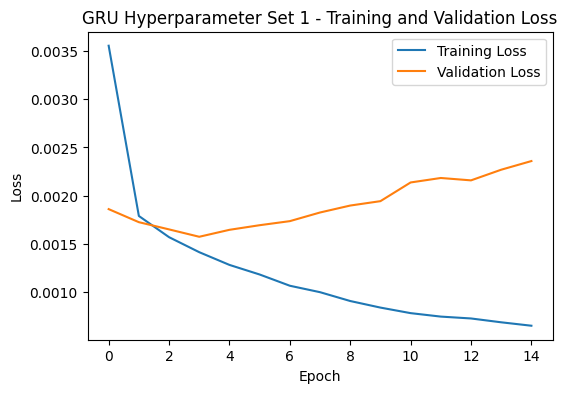

In [ ]:
#Plotted the training & validation loss.

plt.figure(figsize=(6, 4))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('GRU Hyperparameter Set 1 - Training and Validation Loss')
plt.legend()
plt.show()


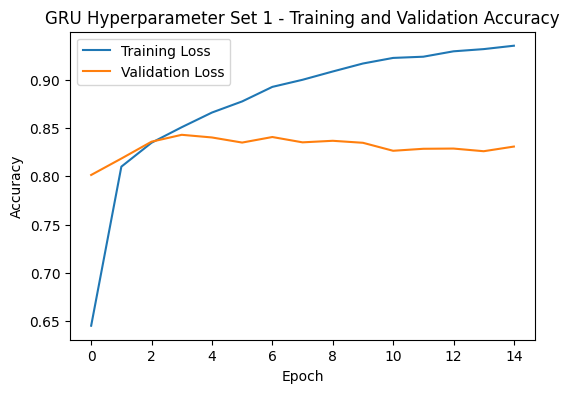

In [ ]:
#Plotted the training & validation accuracy.

plt.figure(figsize=(6, 4))
plt.plot(train_accuracies, label='Training Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('GRU Hyperparameter Set 1 - Training and Validation Accuracy')
plt.legend()
plt.show()

## Hyperparameters Set 2

In Set 1, the validation performance was low, but overfitting was high.
Therefore, to investigate if increasing model complexity improves the validation accuracy & increasing dropout decreases the overfitting, the following parameters were used in Set 2: 

Embedding Size = 100

Hidden Layer Width = 64

Number of GRU Layers = 2

Dropout Probability = 0.8

Epochs = 15

In [ ]:
#Set the model hyperparameters. 

vocab_size=len(wordstoindex)
embedding_dim=100
hidden_dim=65
num_layers=2
dropout_prob=0.8
output_size=6

#Created the model & pushed it to the device (depending on cpu/gpu availability)

model = GRU_Classifier(vocab_size, output_size, embedding_dim, hidden_dim, num_layers, dropout_prob)
model = model.to(device)

In [ ]:
# Set the number of epochs, learning rate, loss function, and optimizer.

num_epochs = 15
learning_rate = 0.005
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Created lists to record loss & accuracy across epochs.

train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

# Train the model & evaluate with val_data using the helper functions.
# Record the performance after every epoch.

for epoch in range(num_epochs):
    train_loss, train_accuracy = GRU_train(model, train_data, criterion, optimizer, device)
    val_loss, val_accuracy = GRU_evaluate(model, val_data, criterion, device)

    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)
    val_losses.append(val_loss)
    val_accuracies.append(val_accuracy)

    print(f"Epoch {epoch + 1}/{num_epochs}")
    print(f"Train Loss: {train_loss:.4f} | Train Accuracy: {train_accuracy:.4f}")
    print(f"Val Loss: {val_loss:.4f} | Val Accuracy: {val_accuracy:.4f}")
    print("--------------------------------------------------")

Epoch 1/15
Train Loss: 0.0029 | Train Accuracy: 0.7072
Val Loss: 0.0018 | Val Accuracy: 0.8054
--------------------------------------------------
Epoch 2/15
Train Loss: 0.0018 | Train Accuracy: 0.8048
Val Loss: 0.0017 | Val Accuracy: 0.8238
--------------------------------------------------
Epoch 3/15
Train Loss: 0.0016 | Train Accuracy: 0.8337
Val Loss: 0.0016 | Val Accuracy: 0.8332
--------------------------------------------------
Epoch 4/15
Train Loss: 0.0014 | Train Accuracy: 0.8540
Val Loss: 0.0017 | Val Accuracy: 0.8357
--------------------------------------------------
Epoch 5/15
Train Loss: 0.0013 | Train Accuracy: 0.8706
Val Loss: 0.0017 | Val Accuracy: 0.8366
--------------------------------------------------
Epoch 6/15
Train Loss: 0.0011 | Train Accuracy: 0.8886
Val Loss: 0.0017 | Val Accuracy: 0.8373
--------------------------------------------------
Epoch 7/15
Train Loss: 0.0010 | Train Accuracy: 0.8998
Val Loss: 0.0020 | Val Accuracy: 0.8364
-----------------------------

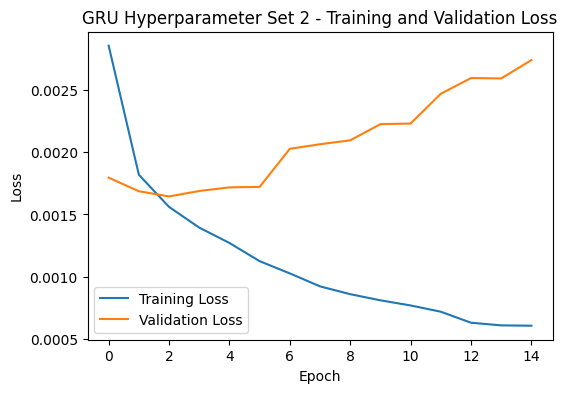

In [ ]:
#Plotted the training & validation loss.

plt.figure(figsize=(6, 4))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('GRU Hyperparameter Set 2 - Training and Validation Loss')
plt.legend()
plt.show()


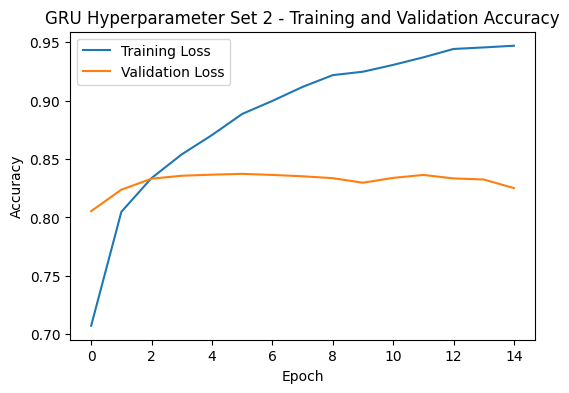

In [ ]:
#Plotted the training & validation accuracy.

plt.figure(figsize=(6, 4))
plt.plot(train_accuracies, label='Training Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('GRU Hyperparameter Set 2 - Training and Validation Accuracy')
plt.legend()
plt.show()

## Final Model

In Set 2, the increase model complexity & dropout did not improve model performance. It is likely that the maximum achievable validation accuracy is approximately 0.83  Therefore, a final model is trained using the following parameters: 

Embedding Size = 50

Hidden Layer Width = 32

Number of GRU Layers = 1

Dropout Probability = 0.8

Epochs = 10

In [ ]:
#Set the model variables. 

vocab_size=len(wordstoindex)
embedding_dim=50
hidden_dim=32
num_layers=1
dropout_prob=0.8
output_size=6

#Created the model & pushed it to the device (depending on cpu/gpu availability)

model = GRU_Classifier(vocab_size, output_size, embedding_dim, hidden_dim, num_layers, dropout_prob)
model = model.to(device)

In [ ]:
#Set the number of epochs, learning rate, loss function, and optimizer.

num_epochs = 10
learning_rate = 0.005
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

#Created lists to record loss & accuracy across epochs.

train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

#Trained the model & evaluate with val_data using the helper functions.
#Record the performance after every epoch.

for epoch in range(num_epochs):
    train_loss, train_accuracy = GRU_train(model, train_data, criterion, optimizer, device)
    val_loss, val_accuracy = GRU_evaluate(model, val_data, criterion, device)

    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)
    val_losses.append(val_loss)
    val_accuracies.append(val_accuracy)

    print(f"Epoch {epoch + 1}/{num_epochs}")
    print(f"Train Loss: {train_loss:.4f} | Train Accuracy: {train_accuracy:.4f}")
    print(f"Val Loss: {val_loss:.4f} | Val Accuracy: {val_accuracy:.4f}")
    print("--------------------------------------------------")

Epoch 1/10
Train Loss: 0.0043 | Train Accuracy: 0.5484
Val Loss: 0.0020 | Val Accuracy: 0.7877
--------------------------------------------------
Epoch 2/10
Train Loss: 0.0024 | Train Accuracy: 0.7473
Val Loss: 0.0018 | Val Accuracy: 0.8058
--------------------------------------------------
Epoch 3/10
Train Loss: 0.0021 | Train Accuracy: 0.7643
Val Loss: 0.0017 | Val Accuracy: 0.8104
--------------------------------------------------
Epoch 4/10
Train Loss: 0.0020 | Train Accuracy: 0.7756
Val Loss: 0.0018 | Val Accuracy: 0.8088
--------------------------------------------------
Epoch 5/10
Train Loss: 0.0019 | Train Accuracy: 0.7844
Val Loss: 0.0017 | Val Accuracy: 0.8102
--------------------------------------------------
Epoch 6/10
Train Loss: 0.0018 | Train Accuracy: 0.7968
Val Loss: 0.0017 | Val Accuracy: 0.8038
--------------------------------------------------
Epoch 7/10
Train Loss: 0.0018 | Train Accuracy: 0.7962
Val Loss: 0.0017 | Val Accuracy: 0.8093
-----------------------------

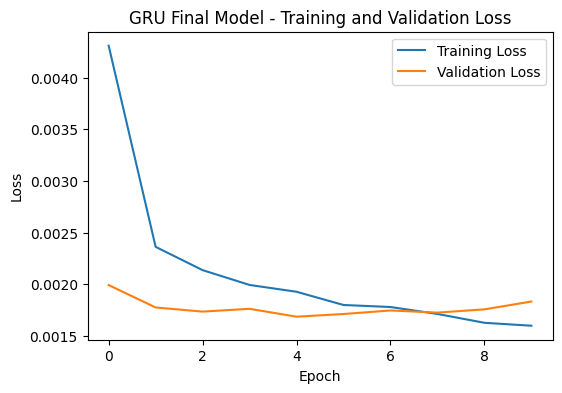

In [ ]:
#Plotted the training & validation loss.

plt.figure(figsize=(6, 4))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('GRU Final Model - Training and Validation Loss')
plt.legend()
plt.show()


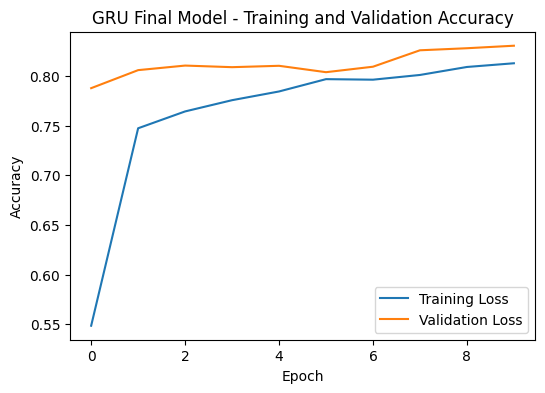

In [ ]:
#Plotted the training & validation accuracy.

plt.figure(figsize=(6, 4))
plt.plot(train_accuracies, label='Training Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('GRU Final Model - Training and Validation Accuracy')
plt.legend()
plt.show()

##Test Set Performance Evaluation

In [ ]:
#Final performance evaluation using the test data.

test_loss, test_accuracy = GRU_test(model, test_data, criterion, device)
print(f"Test Loss: {test_loss:.4f} | Test Accuracy: {test_accuracy:.4f}")

Test Loss: 0.0021 | Test Accuracy: 0.8224


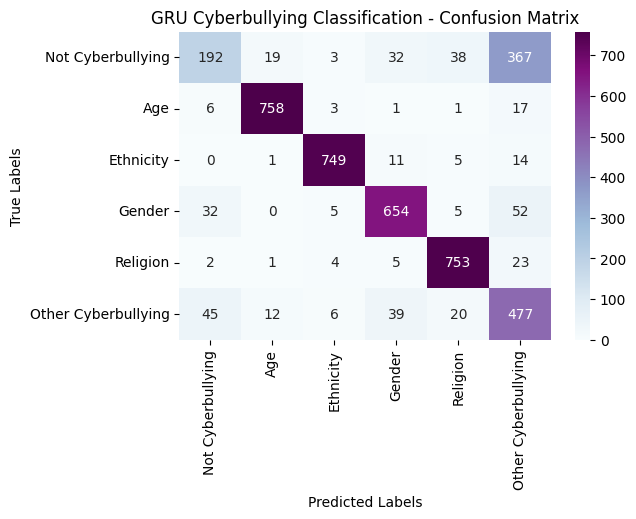

In [ ]:
#Created a confusion matrix of the GRU results.

#dRetrieved the labels & predictions.
true_labels = []
predicted_labels = []

with torch.no_grad():
    for inputs, labels in test_data:
        inputs = inputs.to(device)
        labels = labels.to(device)

        hidden = model.init_hidden()
        outputs, hidden = model(inputs, hidden)

        _, preds = torch.max(outputs, 1)

        true_labels.extend(labels.cpu().numpy())
        predicted_labels.extend(preds.cpu().numpy())


#Convert the lists to numpy arrays.
true_labels = np.array(true_labels)
predicted_labels = np.array(predicted_labels)

#Class labels
class_labels = ['Not Cyberbullying', 'Age', 'Ethnicity', 'Gender', 'Religion', 'Other Cyberbullying']

#Compute the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="BuPu", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('GRU Cyberbullying Classification - Confusion Matrix')
plt.show()